In [1]:
import pymunk
import pymunk.matplotlib_util
from pymunk.vec2d import Vec2d
import os
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

from matplotlib import animation
from IPython.display import HTML

from matplotlib.patches import RegularPolygon
from matplotlib.collections import PatchCollection

Loading chipmunk for Windows (64bit) [C:\Users\bcarrion\AppData\Local\Continuum\miniconda3\envs\PRDW\lib\site-packages\pymunk\chipmunk.dll]


In [2]:
### environment
## find the centers of the fibonacci hexagons

def next_level(points, r, angle):
    next_points = []
    for p in points:
        next_points.append((p[0] - r*np.sin(np.deg2rad(angle)), 
                            p[1] - r*np.cos(np.deg2rad(angle))))
        next_points.append((p[0] + r*np.sin(np.deg2rad(angle)), 
                            p[1] - r*np.cos(np.deg2rad(angle))))
        
    out = np.array(next_points)
    return np.unique(out.round(decimals=5), axis = 0)
        
radius = 1
angle = 30
p0 = np.array((0,0))

levels = [[p0]]
for i in range(21):
    levels.append(next_level(levels[-1], r=radius, angle=angle))

# points = np.concatenate(levels)

In [3]:
numlevels = 12
firstlevel = 8

pointshex = np.concatenate(levels[:numlevels])
pointshex[:,1] += levels[firstlevel][0][1]

points = np.concatenate(levels[firstlevel:firstlevel+numlevels])

In [ ]:
bottom = levels[firstlevel+numlevels]
nbottom = len(bottom)

squeeze = 0.963
nplus = 6
start = bottom[0].copy()
start[0] = start[0]*squeeze
end = bottom[-1].copy()
end[0] = end[0]*squeeze
newbottom = []
for i in range(nbottom+nplus):
    newbottom.append(start+ (end - start)*i/(nbottom+nplus-1))
newbottom = np.array(newbottom)
under = next_level(newbottom, r=radius, angle=10)

under = next_level(newbottom, r=radius, angle=10)

In [23]:
aa = iter(under)
bb = iter(newbottom)

ai = next(aa)
spikes = [(ai[0], -33)]
spikes.append(ai)

for i in range(len(newbottom)):
    spikes.append(next(bb))
    
    ai = next(aa)
    spikes.append(ai)
    spikes.append((ai[0], -33))
    
    try: 
        ai = next(aa)
        spikes.append((ai[0], -33))
        spikes.append(ai)
    except:
        pass
    
spikes = np.array(spikes)

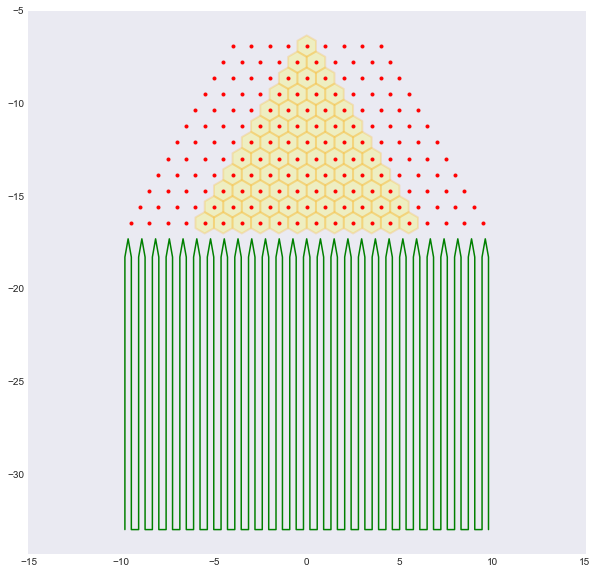

In [26]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
ax.plot(points[:,0], points[:, 1], 'r.')
# ax.plot(levels[firstlevel+numlevels][:,0], levels[firstlevel+numlevels][:,1], 'b.-')
# ax.plot(newbottom[:,0], newbottom[:,1], 'gx')
# ax.plot(under[:,0], under[:,1], 'gx')
ax.plot(spikes[:, 0], spikes[:, 1], 'g')


patches = []
for p in pointshex:
    patches.append(RegularPolygon(p, 6, radius/2/np.cos(np.deg2rad(30))))
    
pc = PatchCollection(patches, facecolor='yellow',edgecolor='orange', lw=2, alpha=0.2)

ax.add_collection(pc)
ax.axis('equal');

In [27]:
np.savetxt('../GIS/csv/points.csv', points, fmt='%.5f')
np.savetxt('../GIS/csv/pointshex.csv', pointshex, fmt='%.5f')
np.savetxt('../GIS/csv/bottom.csv', bottom, fmt='%.5f')
np.savetxt('../GIS/csv/newbottom.csv', np.array(newbottom), fmt='%.5f')
np.savetxt('../GIS/csv/spikes.csv', np.array(spikes), fmt='%.5f')

In [25]:
np.diff(under[:,0])

array([0.3473 , 0.39347, 0.3473 , 0.39347, 0.3473 , 0.39347, 0.3473 ,
       0.39347, 0.3473 , 0.39347, 0.34729, 0.39348, 0.34729, 0.39348,
       0.34729, 0.39348, 0.34729, 0.39347, 0.3473 , 0.39347, 0.3473 ,
       0.39347, 0.3473 , 0.39347, 0.3473 , 0.39347, 0.3473 , 0.39347,
       0.3473 , 0.39347, 0.3473 , 0.39347, 0.3473 , 0.39347, 0.3473 ,
       0.39347, 0.34729, 0.39348, 0.34729, 0.39348, 0.34729, 0.39348,
       0.34729, 0.39347, 0.3473 , 0.39347, 0.3473 , 0.39347, 0.3473 ,
       0.39347, 0.3473 , 0.39347, 0.3473 ])

In [8]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9.81
    space.damping = 0.99
    return space

In [9]:
def setup_environment(space, points, radius):
    for p in points:
        body = pymunk.Body(body_type = pymunk.Body.STATIC)
        body.position = Vec2d(tuple(p))
        circle = pymunk.Circle(body, radius = radius)
        circle.elasticity = 0.9999999
        space.add(body, circle)

In [10]:
def setup_balls(space, radius, mass):
    moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
    body = pymunk.Body(mass, moment)
    body.position = np.random.rand(2) + np.array([0, 2])
    body.start_position = Vec2d(body.position)
    shape = pymunk.Circle(body, radius)
    shape.elasticity = 0.9999999
    space.add(body, shape)   
    

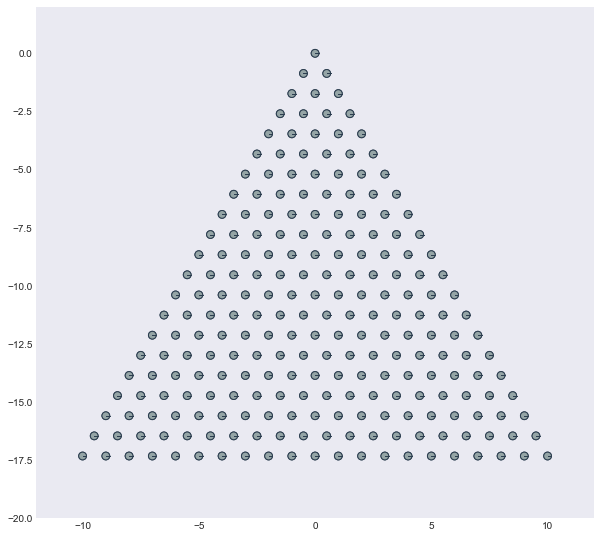

In [11]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
ax.set_xlim(-12, 12)
ax.set_ylim(-20, 2)
ax.set_aspect("equal")

space = setup_space()
setup_environment(space, points, radius/6)
setup_balls(space, radius/8, 10)

o = pymunk.matplotlib_util.DrawOptions(ax)

   
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    ax.set_xlim(-12, 12)
    ax.set_ylim(-20, 2)
    ax.set_aspect("equal")
    space.debug_draw(o)
    return []

frames = 505
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())

## pymunk animation example

In [4]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space

def setup_balls(space):
    width = 600
    height = 600
    for x in range(-100,150,50):
        x += width / 2
        offset_y = height/2
        mass = 10
        radius = 25
        moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
        body = pymunk.Body(mass, moment)
        body.position = x, -125+offset_y
        body.start_position = Vec2d(body.position)
        shape = pymunk.Circle(body, radius)
        shape.elasticity = 0.9999999
        space.add(body, shape)
        pj = pymunk.PinJoint(space.static_body, body, (x, 125+offset_y), (0,0))
        space.add(pj)

fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
# ax = plt.axes()
ax.set_aspect("equal")

space = setup_space()
setup_balls(space)

o = pymunk.matplotlib_util.DrawOptions(ax)
#space.debug_draw(o)

space.shapes[1].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 600)
    space.debug_draw(o)
    return []

frames = 105
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())